In [28]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import matplotlib.pyplot as plt


In [30]:
data_dir = "Documents/PRODIGY_ML_03/PetImages"  # Replace with the path to your dataset
categories = ["cats", "dogs"]
image_size = (64, 64)  # Resize all images to 64x64


In [32]:
import os
from PIL import Image

# Path to dataset
data_dir = "PetImages2"  # Replace with the full path if needed

# Check if the dataset directory exists
if not os.path.exists(data_dir):
    print("Dataset directory not found. Please check the path!")
else:
    print(f"Dataset found at: {data_dir}")

# Count the number of images in each category
categories = ["Cat", "Dog"]
for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.exists(category_path):
        num_images = len(os.listdir(category_path))
        print(f"{category}: {num_images} images")
    else:
        print(f"Category '{category}' not found in the dataset.")


Dataset found at: PetImages2
Cat: 36 images
Dog: 36 images


In [34]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

# Parameters
data_dir = "PetImages2"  # Ensure the correct path here
categories = ["Cat", "Dog"]
image_size = (64, 64)  # Resize all images to 64x64

# Function to load images and handle errors
def load_images(data_dir, categories, image_size):
    data = []
    labels = []
    for label, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        for file in os.listdir(category_path):
            img_path = os.path.join(category_path, file)
            try:
                # Try reading image with Pillow to handle multiple frames or corrupted images
                img = Image.open(img_path)
                img = img.convert('L')  # Convert image to grayscale

                # Check if the image can be resized and flattened
                img_resized = img.resize(image_size)
                img_resized = np.array(img_resized)  # Convert to numpy array

                # Check if image size is consistent
                if img_resized.shape == image_size:
                    data.append(img_resized.flatten())  # Flatten image to 1D vector
                    labels.append(label)  # 0 for Cat, 1 for Dog
                else:
                    print(f"Skipping {img_path} due to unexpected size")
            except (IOError, EOFError, ValueError) as e:
                print(f"Error reading {img_path}: {e}")  # Skip corrupted images
    return np.array(data), np.array(labels)

# Load dataset
X, y = load_images(data_dir, categories, image_size)
print("Dataset loaded successfully!")
print(f"Feature shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Dataset loaded successfully!
Feature shape: (72, 4096)
Labels shape: (72,)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (57, 4096)
Test set size: (15, 4096)


Model trained successfully!
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.29      0.40      0.33         5

    accuracy                           0.47        15
   macro avg       0.46      0.45      0.44        15
weighted avg       0.51      0.47      0.48        15

Accuracy: 0.4666666666666667


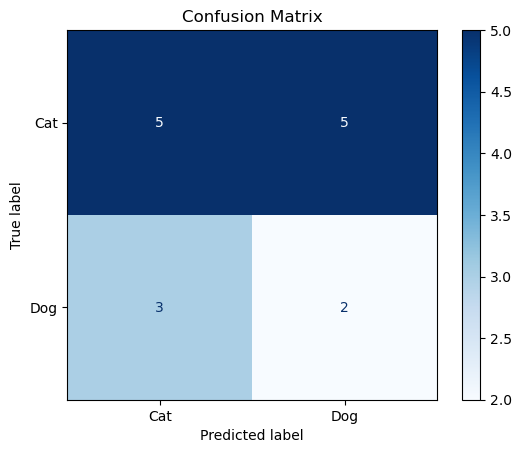

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the SVM classifier
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train, y_train)
print("Model trained successfully!")

# Evaluate the model
y_pred = svm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

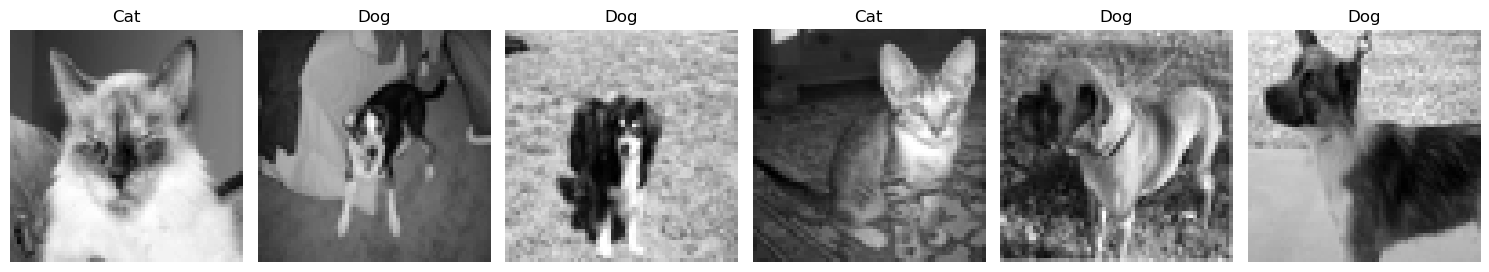

In [40]:
import matplotlib.pyplot as plt

# Display sample images
def plot_sample_images(X, y, categories, image_size, n_samples=6):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
    for i in range(n_samples):
        ax = axes[i]
        img = X[i].reshape(image_size)  # Reshape to original image size
        label = categories[y[i]]
        ax.imshow(img, cmap="gray")
        ax.set_title(label)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plot_sample_images(X_train, y_train, categories, image_size)


In [39]:
def predict_image(img_path, model, image_size):
    img = Image.open(img_path)
    img = img.convert('L')
    img_resized = img.resize(image_size)
    img_resized = np.array(img_resized)
    features = img_resized.flatten().reshape(1, -1)  # Flatten the image for prediction
    prediction = model.predict(features)
    return "Cat" if prediction[0] == 0 else "Dog"

# Test the model with a sample image
sample_image_path = sample_image_path = "C:/Users/DELL/Documents/PRODIGY_ML_03/catts.jpg"  # Adjust to the full path

result = predict_image(sample_image_path, svm, image_size)
print(f"Prediction: {result}")


Prediction: Cat


In [41]:
def predict_image(img_path, model, image_size):
    img = Image.open(img_path)
    img = img.convert('L')
    img_resized = img.resize(image_size)
    img_resized = np.array(img_resized)
    features = img_resized.flatten().reshape(1, -1)  # Flatten the image for prediction
    prediction = model.predict(features)
    return "Cat" if prediction[0] == 0 else "Dog"

# Test the model with a sample image
sample_image_path = sample_image_path = "C:/Users/DELL/Documents/PRODIGY_ML_03/dogggs.jpg"  # Adjust to the full path

result = predict_image(sample_image_path, svm, image_size)
print(f"Prediction: {result}")


Prediction: Dog
